In [31]:
#! /usr/bin/env python

# Load useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# 1. CI for the mean
Method 1 - CLT

In [32]:
# 1
n = 50;
x = np.random.randn(n)

In [33]:
# 2
print 'sample mean is ', x.mean()
print 'standard error is ', x.std()/np.sqrt(n)

sample mean is  0.10722685900480686
standard error is  0.14899803192436673


In [34]:
# 3
#using function
from scipy.stats import t
print t.interval(0.95, 50)
# reading table (for n = 50)
t95 = 2.009

print 'CI at 95% is', x.mean() - t95 *x.std()/np.sqrt(n), x.mean() + t95 * x.std()/np.sqrt(n)

(-2.008559109715206, 2.008559109715206)
CI at 95% is -0.19211018713124592 0.4065639051408596


Method 2 - Bootstrapping

In [35]:
m = 100000 # number of bootstrap samples
mu_boot = []
for i in range(m):
    boots = [x[np.random.randint(n)] for i in range(n)]
    mu_boot.append(np.mean(boots))

mean is  0.10654262630644151
std is  0.1488738288187061


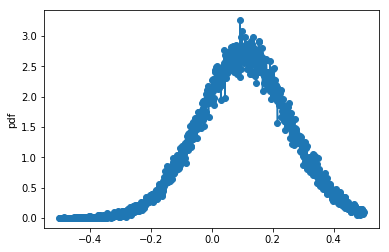

In [36]:
def normhistogram(u,bins):
    pdf, _ = np.histogram(u,bins)
    pdf = pdf / ((bins[2]-bins[1])*len(u))
    return pdf

print 'mean is ', np.mean(mu_boot)
print 'std is ', np.std(mu_boot)


bins = np.arange(-.5,.5,0.001)
pdf = normhistogram(mu_boot,bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.ylabel('pdf'); 
plt.show()

 
95% chance in interval [ -0.18399999999999972 , 0.4030000000000008 ]


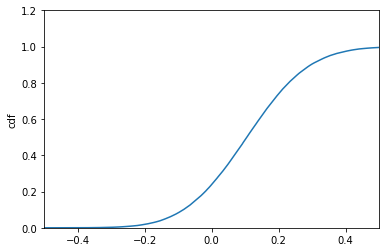

In [37]:
cdf = np.cumsum(pdf*(bins[1:]-bins[:-1]))

plt.plot(0.5*(bins[:-1]+bins[1:]),cdf,'-');
plt.axis([-0.5,0.5,0,1.2])
plt.ylabel('cdf')

print ' '
per = 0.95
imin_boot = np.max(np.where(cdf<(1-per)/2))
imax_boot = np.min(np.where(cdf>1-(1-per)/2))
print '95% chance in interval [', bins[imin_boot],',',bins[imax_boot],']'


Method 3 - The ideal world

mean is  -0.000418682902632937
std is  0.14189418727757097
 
95% chance in interval [ -0.2789999999999998 , 0.2770000000000007 ]


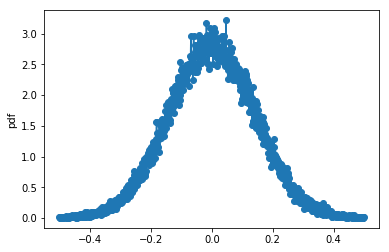

In [38]:
y = np.random.randn(n,m)
mu_ideal = np.mean(y,0)

print 'mean is ', np.mean(mu_ideal)
print 'std is ', np.std(mu_ideal)

bins = np.arange(-.5,.5,0.001)
pdf = normhistogram(mu_ideal,bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.ylabel('pdf'); 

cdf = np.cumsum(pdf*(bins[1:]-bins[:-1]))

print ' '
per = 0.95
imin_ideal = np.max(np.where(cdf<(1-per)/2))
imax_ideal = np.min(np.where(cdf>1-(1-per)/2))
print '95% chance in interval [', bins[imin_ideal],',',bins[imax_ideal],']'


In [39]:
print '------------------'
print 'standard errors : '
print '------------------'
print 'CLT      ', x.std()/np.sqrt(n)
print 'bootstrap', np.std(mu_boot)
print 'ideal    ', np.std(mu_ideal)
print ' '
print '------------------'
print '95% confidence interval : '
print '------------------'
print 'CLT       [', x.mean() - t95 *x.std()/np.sqrt(n), x.mean() + t95 * x.std()/np.sqrt(n),']'
print 'bootstrap [', bins[imin_boot],',',bins[imax_boot],']'
print 'ideal     [', bins[imin_ideal],',',bins[imax_ideal],']'
print ' '

------------------
standard errors : 
------------------
CLT       0.14899803192436673
bootstrap 0.1488738288187061
ideal     0.14189418727757097
 
------------------
95% confidence interval : 
------------------
CLT       [ -0.19211018713124592 0.4065639051408596 ]
bootstrap [ -0.18399999999999972 , 0.4030000000000008 ]
ideal     [ -0.2789999999999998 , 0.2770000000000007 ]
 


# Bootstrapped CI for the median

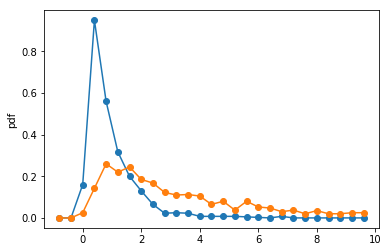

In [27]:
#define a log-normal distribution with mean=1 and std=1:
n=1000; m = 1.; v=1.;

mux = np.log((m**2)/np.sqrt(v+m**2));
sigx = np.sqrt(np.log(v/(m**2)+1));

###########

x = np.random.lognormal(mux,sigx,n)

bins = np.arange(-1,10.,0.4)
pdf = normhistogram(x,bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.ylabel('pdf'); 

############

x2 = np.random.lognormal(1,1,n)
pdf = normhistogram(x2,bins)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.ylabel('pdf'); 
plt.show()

############


In [28]:
#compute mean and median
print x.mean(), x.std() # s?hould be close to 1,
print 'median is ', np.median(x)

0.9655176352223637 0.9846823157608999
median is  0.6748311309180838


In [29]:
#use bootstrapping to evaluate the standard error on the sample mean and sample median
m = 10000 # number of bootstrap samples
mu_boot = []
med_boot = []
for i in range(m):
    boots = [x[np.random.randint(n)] for i in range(n)]
    mu_boot.append(np.mean(boots))
    med_boot.append(np.median(boots))

bins = np.arange(0.5,1.5,0.001)
pdf = normhistogram(mu_boot,bins)
cdf = np.cumsum(pdf*(bins[1:]-bins[:-1]))
per = 0.95
imin_boot = np.max(np.where(cdf<(1-per)/2))
imax_boot = np.min(np.where(cdf>1-(1-per)/2))
print '----------'
print 'MEAN'
print 'mean is ', np.mean(mu_boot)
print 'std is ', np.std(mu_boot)
print '95% chance in interval [', bins[imin_boot],',',bins[imax_boot],']'

pdf = normhistogram(med_boot,bins)
cdf = np.cumsum(pdf*(bins[1:]-bins[:-1]))
per = 0.95
imin_boot = np.max(np.where(cdf<(1-per)/2))
imax_boot = np.min(np.where(cdf>1-(1-per)/2))
print '----------'
print 'MEDIAN'
print 'mean is ', np.mean(med_boot)
print 'std is ', np.std(med_boot)
print '95% chance in interval [', bins[imin_boot],',',bins[imax_boot],']'
print '----------'

----------
MEAN
mean is  0.9651738432938317
std is  0.031275740638241456
95% chance in interval [ 0.9050000000000004 , 1.0280000000000005 ]
----------
MEDIAN
mean is  0.6730402781536708
std is  0.021206382247414723
95% chance in interval [ 0.6280000000000001 , 0.7160000000000002 ]
----------


In [30]:
m = 1000
mu_ideal = []
med_ideal = []
for  i in range(m):
    mu_ideal.append(np.mean(np.random.lognormal(mux,sigx,n)))
    med_ideal.append(np.median(np.random.lognormal(mux,sigx,n)))

bins = np.arange(0.5,1.5,0.001)
pdf = normhistogram(mu_ideal,bins)
cdf = np.cumsum(pdf*(bins[1:]-bins[:-1]))
per = 0.95
imin_ideal = np.max(np.where(cdf<(1-per)/2))
imax_ideal = np.min(np.where(cdf>1-(1-per)/2))
print '----------'
print 'MEAN'
print 'mean is ', np.mean(mu_ideal)
print 'std is ', np.std(mu_ideal)
print '95% chance in interval [', bins[imin_ideal],',',bins[imax_ideal],']'

pdf = normhistogram(med_ideal,bins)
cdf = np.cumsum(pdf*(bins[1:]-bins[:-1]))
per = 0.95
imin_ideal = np.max(np.where(cdf<(1-per)/2))
imax_ideal = np.min(np.where(cdf>1-(1-per)/2))
print '----------'
print 'MEDIAN'
print 'mean is ', np.mean(med_ideal)
print 'std is ', np.std(med_ideal)
print '95% chance in interval [', bins[imin_ideal],',',bins[imax_ideal],']'
print '----------'

----------
MEAN
mean is  0.9997049628215635
std is  0.032608978031610704
95% chance in interval [ 0.9380000000000004 , 1.0650000000000004 ]
----------
MEDIAN
mean is  0.7067381008462162
std is  0.023891241995238118
95% chance in interval [ 0.6620000000000001 , 0.7550000000000002 ]
----------
